Collect Combined Cycle Power Plant (CCPP) dataset, which contains 9568 observations
from UCI repository. Perform exploratory data analysis (EDA) to understand the data
distribution, detect missing values, and visualize relationships between features and the
target variable. Preprocess the data. Split the dataset into training (80%) and testing
(20%)  sets.  Implement  at  least  two  regression  models,  such  as  Linear  Regression,
Decision Tree Regression, Random Forest Regression, or any other advanced technique
of your choice. Evaluate the models using appropriate regression performance metrics. Compare the performance of the models and justify which model is more suitable for predicting power output

In [ ]:
%pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
combined_cycle_power_plant = fetch_ucirepo(id=294)

# data (as pandas dataframes)
X = combined_cycle_power_plant.data.features
y = combined_cycle_power_plant.data.targets

# metadata
print(combined_cycle_power_plant.metadata)

# variable information
print(combined_cycle_power_plant.variables)


In [ ]:
X.head()

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [ ]:
y.head()

,PE
0,463.26
1,444.37
2,488.56
3,446.48
4,473.90


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ccpp_df = pd.concat([X,y],axis=1)

In [ ]:
ccpp_df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
df = ccpp_df.rename(columns={'AT':'Temparature','V':'ExhaustVaccum','AP':'AmbientPressure','RH':'RelativeHumidity','PE':'EnergyOutput'})
df.head()

,Temparature,ExhaustVaccum,AmbientPressure,RelativeHumidity,EnergyOutput
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temparature       9568 non-null   float64
 1   ExhaustVaccum     9568 non-null   float64
 2   AmbientPressure   9568 non-null   float64
 3   RelativeHumidity  9568 non-null   float64
 4   EnergyOutput      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
df.shape

(9568, 5)

In [ ]:
df.describe()

,Temparature,ExhaustVaccum,AmbientPressure,RelativeHumidity,EnergyOutput
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [ ]:
stats = pd.DataFrame()

stats['Median'] = df.median()
stats['Range'] = df.max() - df.min()
stats['IQR'] = df.quantile(0.75) - df.quantile(0.25)
stats

,Median,Range,IQR
Temparature,20.345,35.30,12.2100
ExhaustVaccum,52.080,56.20,24.8000
AmbientPressure,1012.940,40.41,8.1600
RelativeHumidity,74.975,74.60,21.5025
EnergyOutput,451.550,75.50,28.6800


Note:

---
Histograms are commonly used to visualize the distribution of numerical data. They divide the data range into intervals (bins) and show the frequency of data points within each bin.

Bins are intervals that divide the data range, and the height of each bar in the histogram represents the number of data points falling within that bin. Increasing the number of bins can provide a more detailed view of the data distribution.


---



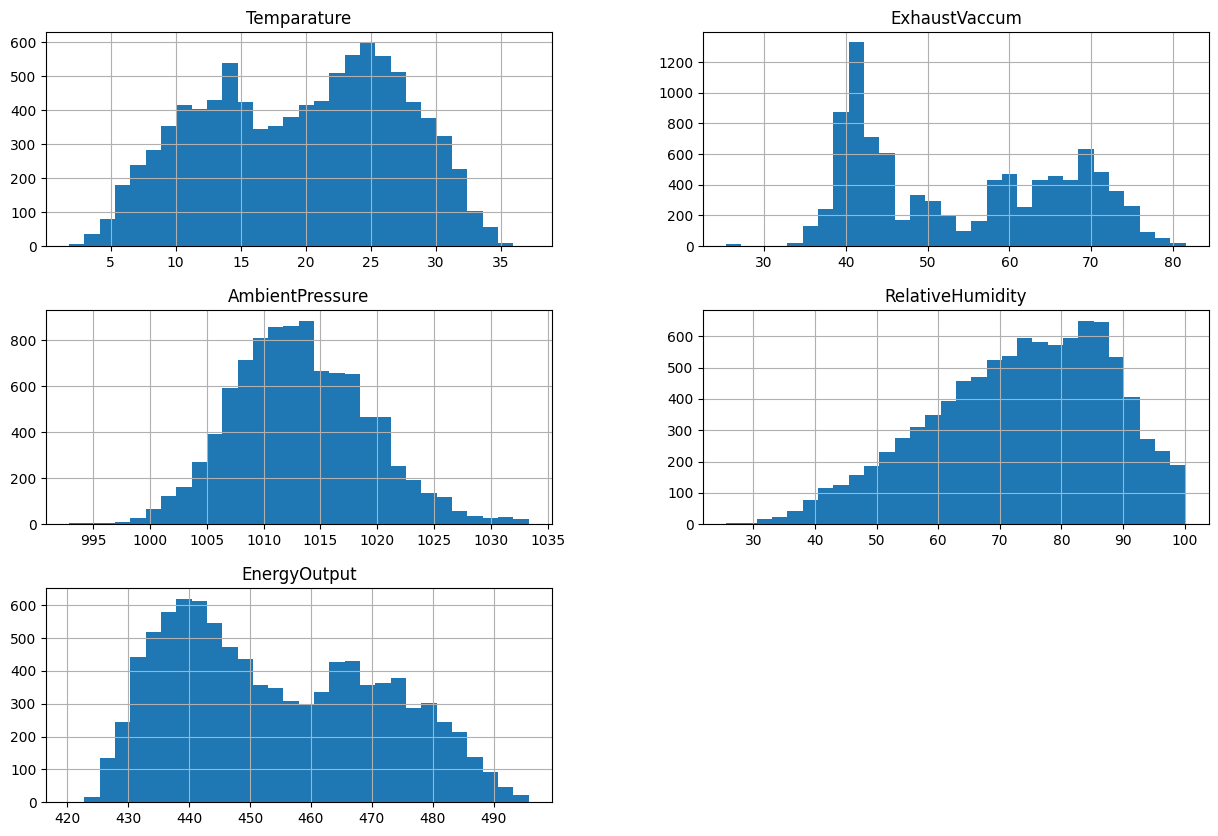

In [ ]:
df.hist(bins=30,figsize=(15,10))
plt.show()

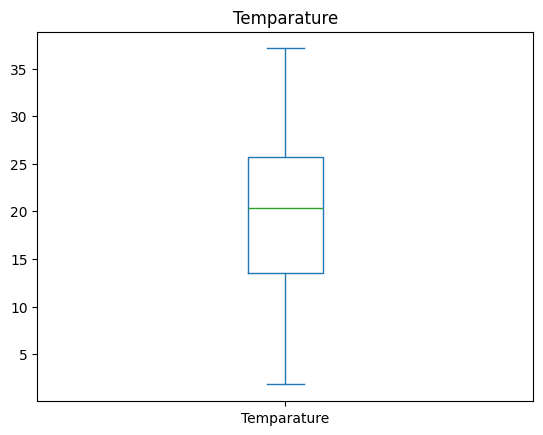

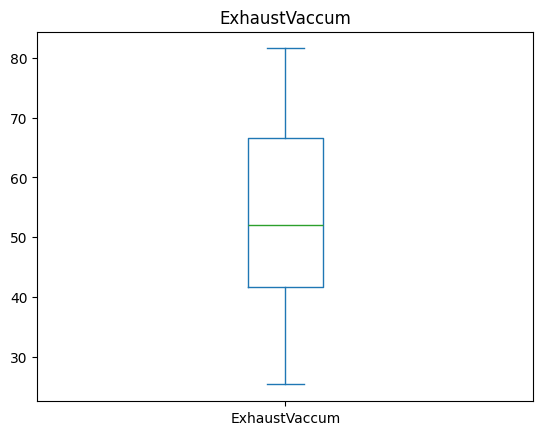

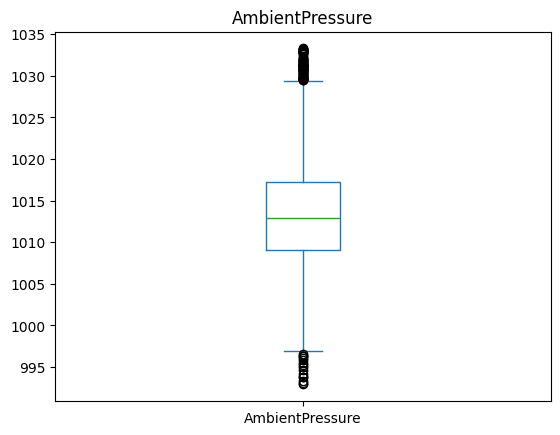

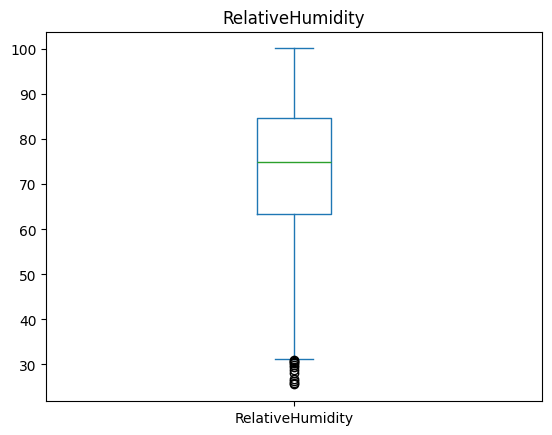

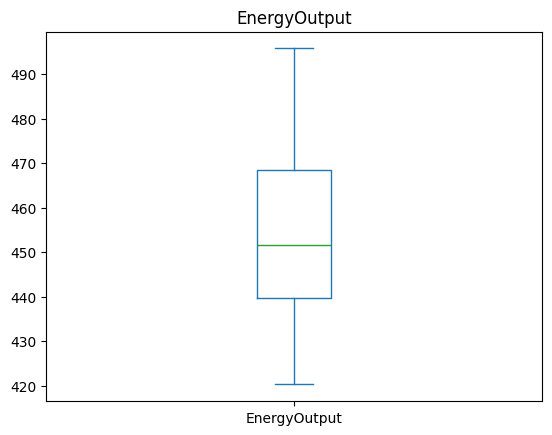

In [ ]:
for i in df.columns:
  fig, ax = plt.subplots()
  df[i].plot(kind='box', ax=ax)
  ax.set_title(i)
  plt.show()

In [ ]:
corrmat = df.corr()
corrmat

,Temparature,ExhaustVaccum,AmbientPressure,RelativeHumidity,EnergyOutput
Temparature,1.000000,0.844107,-0.507549,-0.542535,-0.948128
ExhaustVaccum,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AmbientPressure,-0.507549,-0.413502,1.000000,0.099574,0.518429
RelativeHumidity,-0.542535,-0.312187,0.099574,1.000000,0.389794
EnergyOutput,-0.948128,-0.869780,0.518429,0.389794,1.000000


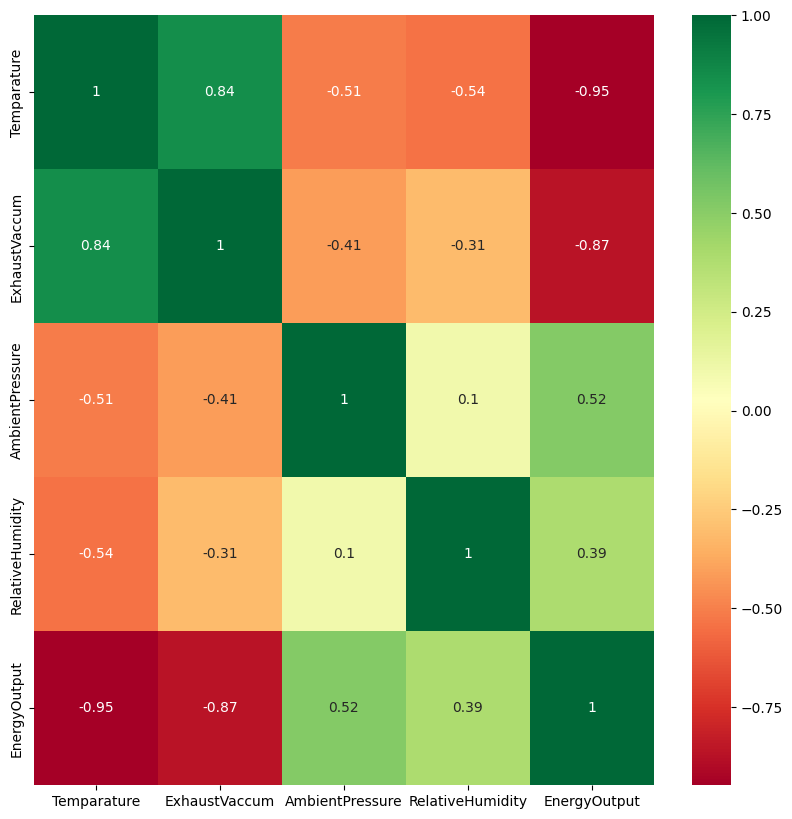

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corrmat ,annot=True,cmap='RdYlGn')
plt.show()

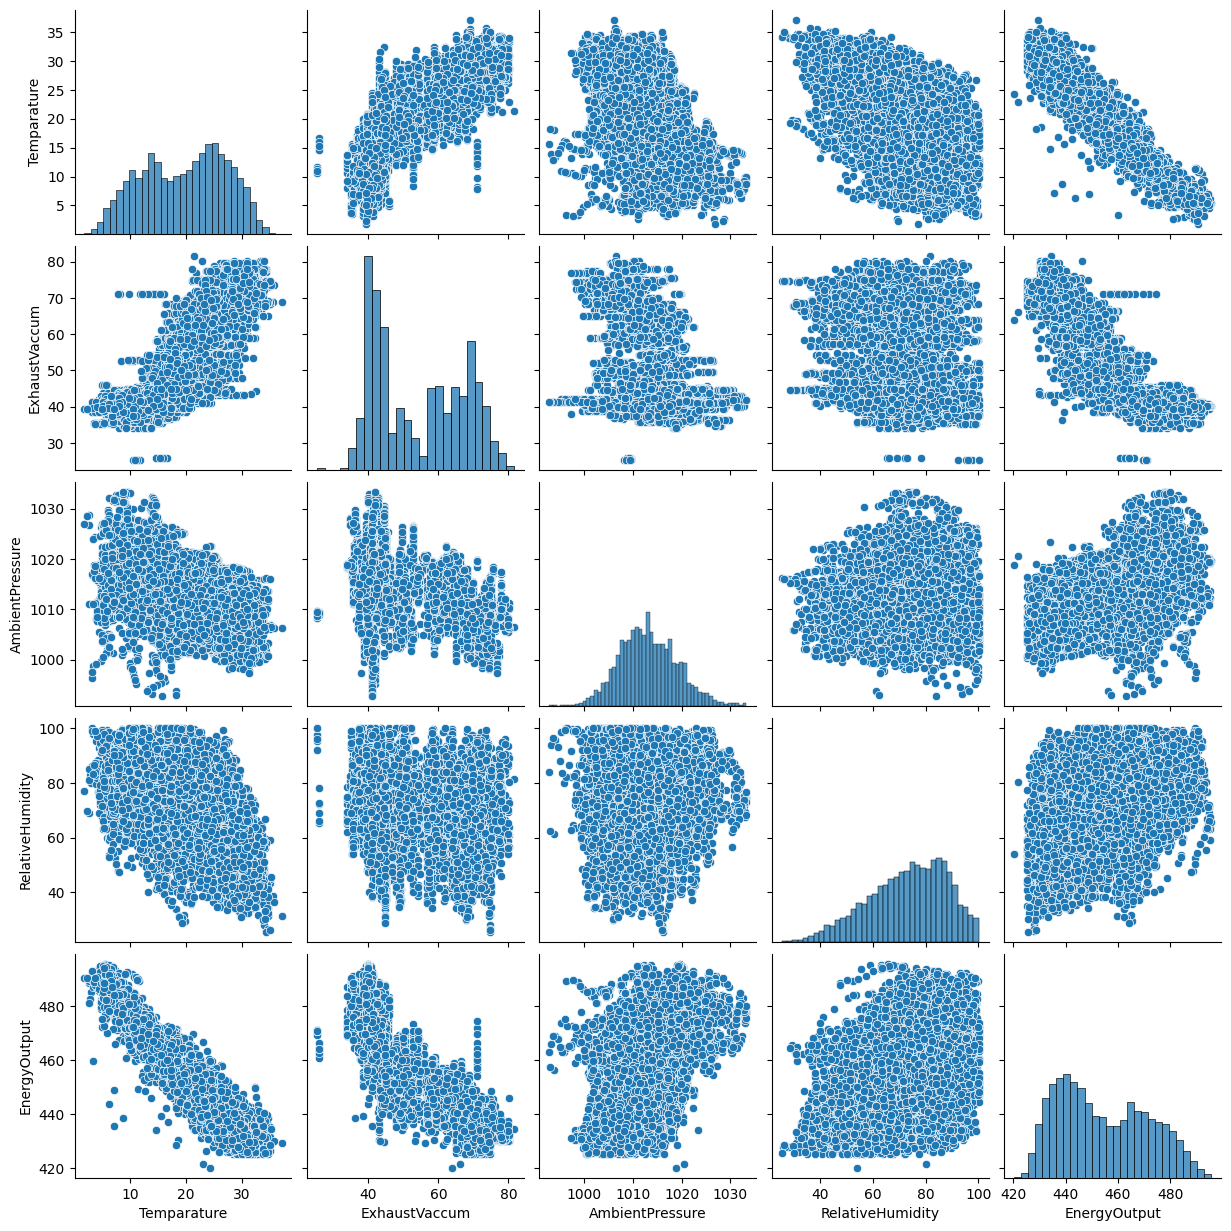

In [ ]:
sns.pairplot(df)

In [ ]:
df.columns

Index(['Temparature', 'ExhaustVaccum', 'AmbientPressure', 'RelativeHumidity',
       'EnergyOutput'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled ,columns=['Temparature', 'ExhaustVaccum', 'AmbientPressure', 'RelativeHumidity','EnergyOutput'])
df_scaled.head()

,Temparature,ExhaustVaccum,AmbientPressure,RelativeHumidity,EnergyOutput
0,-0.629519,-0.987297,1.820488,-0.009519,0.521208
1,0.741909,0.681045,1.141863,-0.974621,-0.585664
2,-1.951297,-1.173018,-0.185078,1.289840,2.003679
3,0.162205,0.237203,-0.508393,0.228160,-0.462028
4,-1.185069,-1.322539,-0.678470,1.596699,1.144666


In [ ]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop(columns=['EnergyOutput'])
y = df['EnergyOutput']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = linear_regression.predict(X_test)

In [ ]:
l_mse = mean_squared_error(y_test, y_pred)
l_r_sqaured = r2_score(y_test, y_pred)
l_mae = mean_absolute_error(y_test, y_pred)
l_rmse = l_mse ** 0.5
print(f"Mean Squared Error = {l_mse}")
print(f"R Squared score = {l_r_sqaured}")
print(f"Mean absolute error = {l_mae}")
print(f"root mean sqaure error = {l_rmse}")

Mean Squared Error = 20.27370599968743
R Squared score = 0.9301046431962188
Mean absolute error = 3.595913178273408
root mean sqaure error = 4.502633229532185


Based on these metrics, particularly the high R-squared value and relatively low MAE and RMSE, we can conclude that the Linear Regression model is performing very well in predicting the energy output of the Combined Cycle Power Plant. The model has successfully captured a significant portion of the variance in the data and is making predictions with a reasonable degree of accuracy.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred1 = dt_regressor.predict(X_test)

In [ ]:
l_mse = mean_squared_error(y_test, y_pred1)
l_r_sqaured = r2_score(y_test, y_pred1)
l_mae = mean_absolute_error(y_test, y_pred1)
l_rmse = l_mse ** 0.5
print(f"Mean Squared Error = {l_mse}")
print(f"R Squared score = {l_r_sqaured}")
print(f"Mean absolute error = {l_mae}")
print(f"root mean sqaure error = {l_rmse}")

Mean Squared Error = 19.95366337513061
R Squared score = 0.9312080178548117
Mean absolute error = 3.04253396029258
root mean sqaure error = 4.466952358726317


The Decision Tree Regressor shows noticeably lower MAE and RMSE values compared to Linear Regression. This implies that the Decision Tree model, on average, produces predictions that are closer to the actual values.